In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas version: 1.5.2
numpy version: 1.25.2
seaborn version: 0.12.2


### use axample data from "An Introduction to Statistical Learning" 
- Teach by Aj.Prasert by using avertising.csv file

In [3]:
df = pd.read_csv('files/Advertising.csv', index_col = 0)
df.head(3)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3


In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


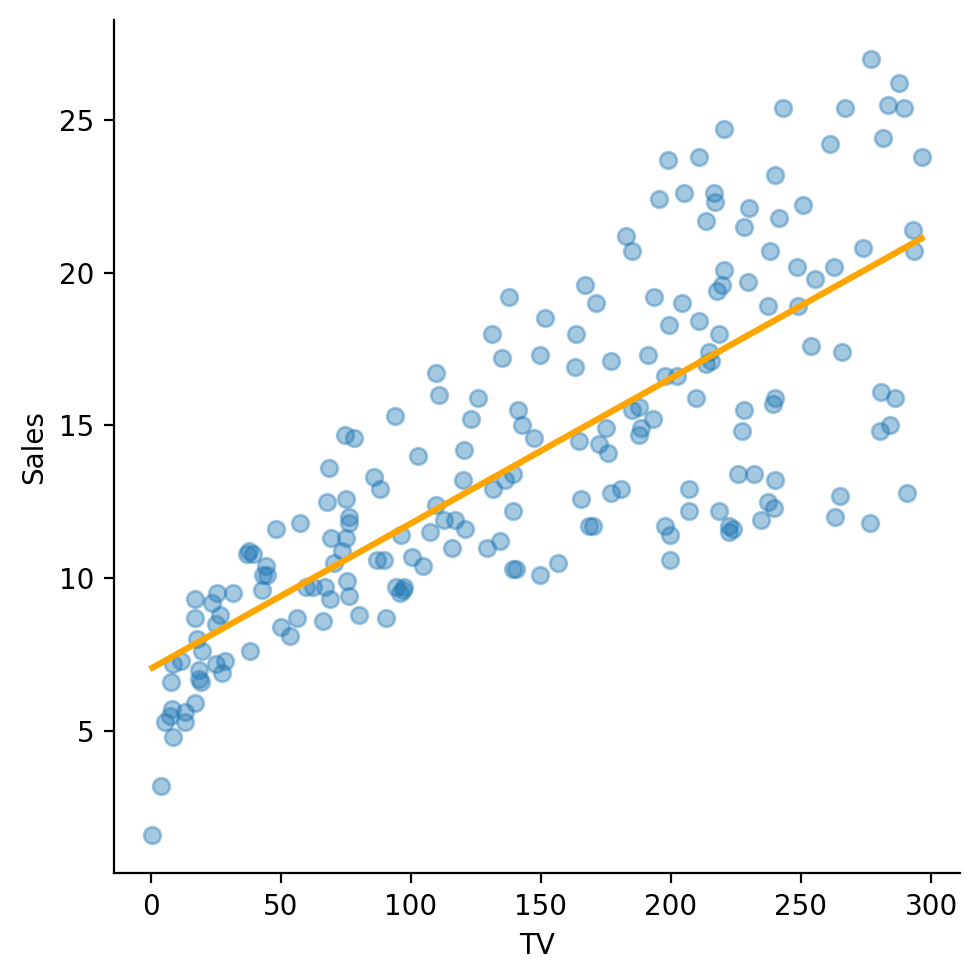

In [6]:
# plot relationship using linear model to see between sale and tv

sns.lmplot(data = df, x = 'TV', y = 'Sales', ci = None, scatter_kws = {'alpha': 0.4}, line_kws = {'color': 'orange'})

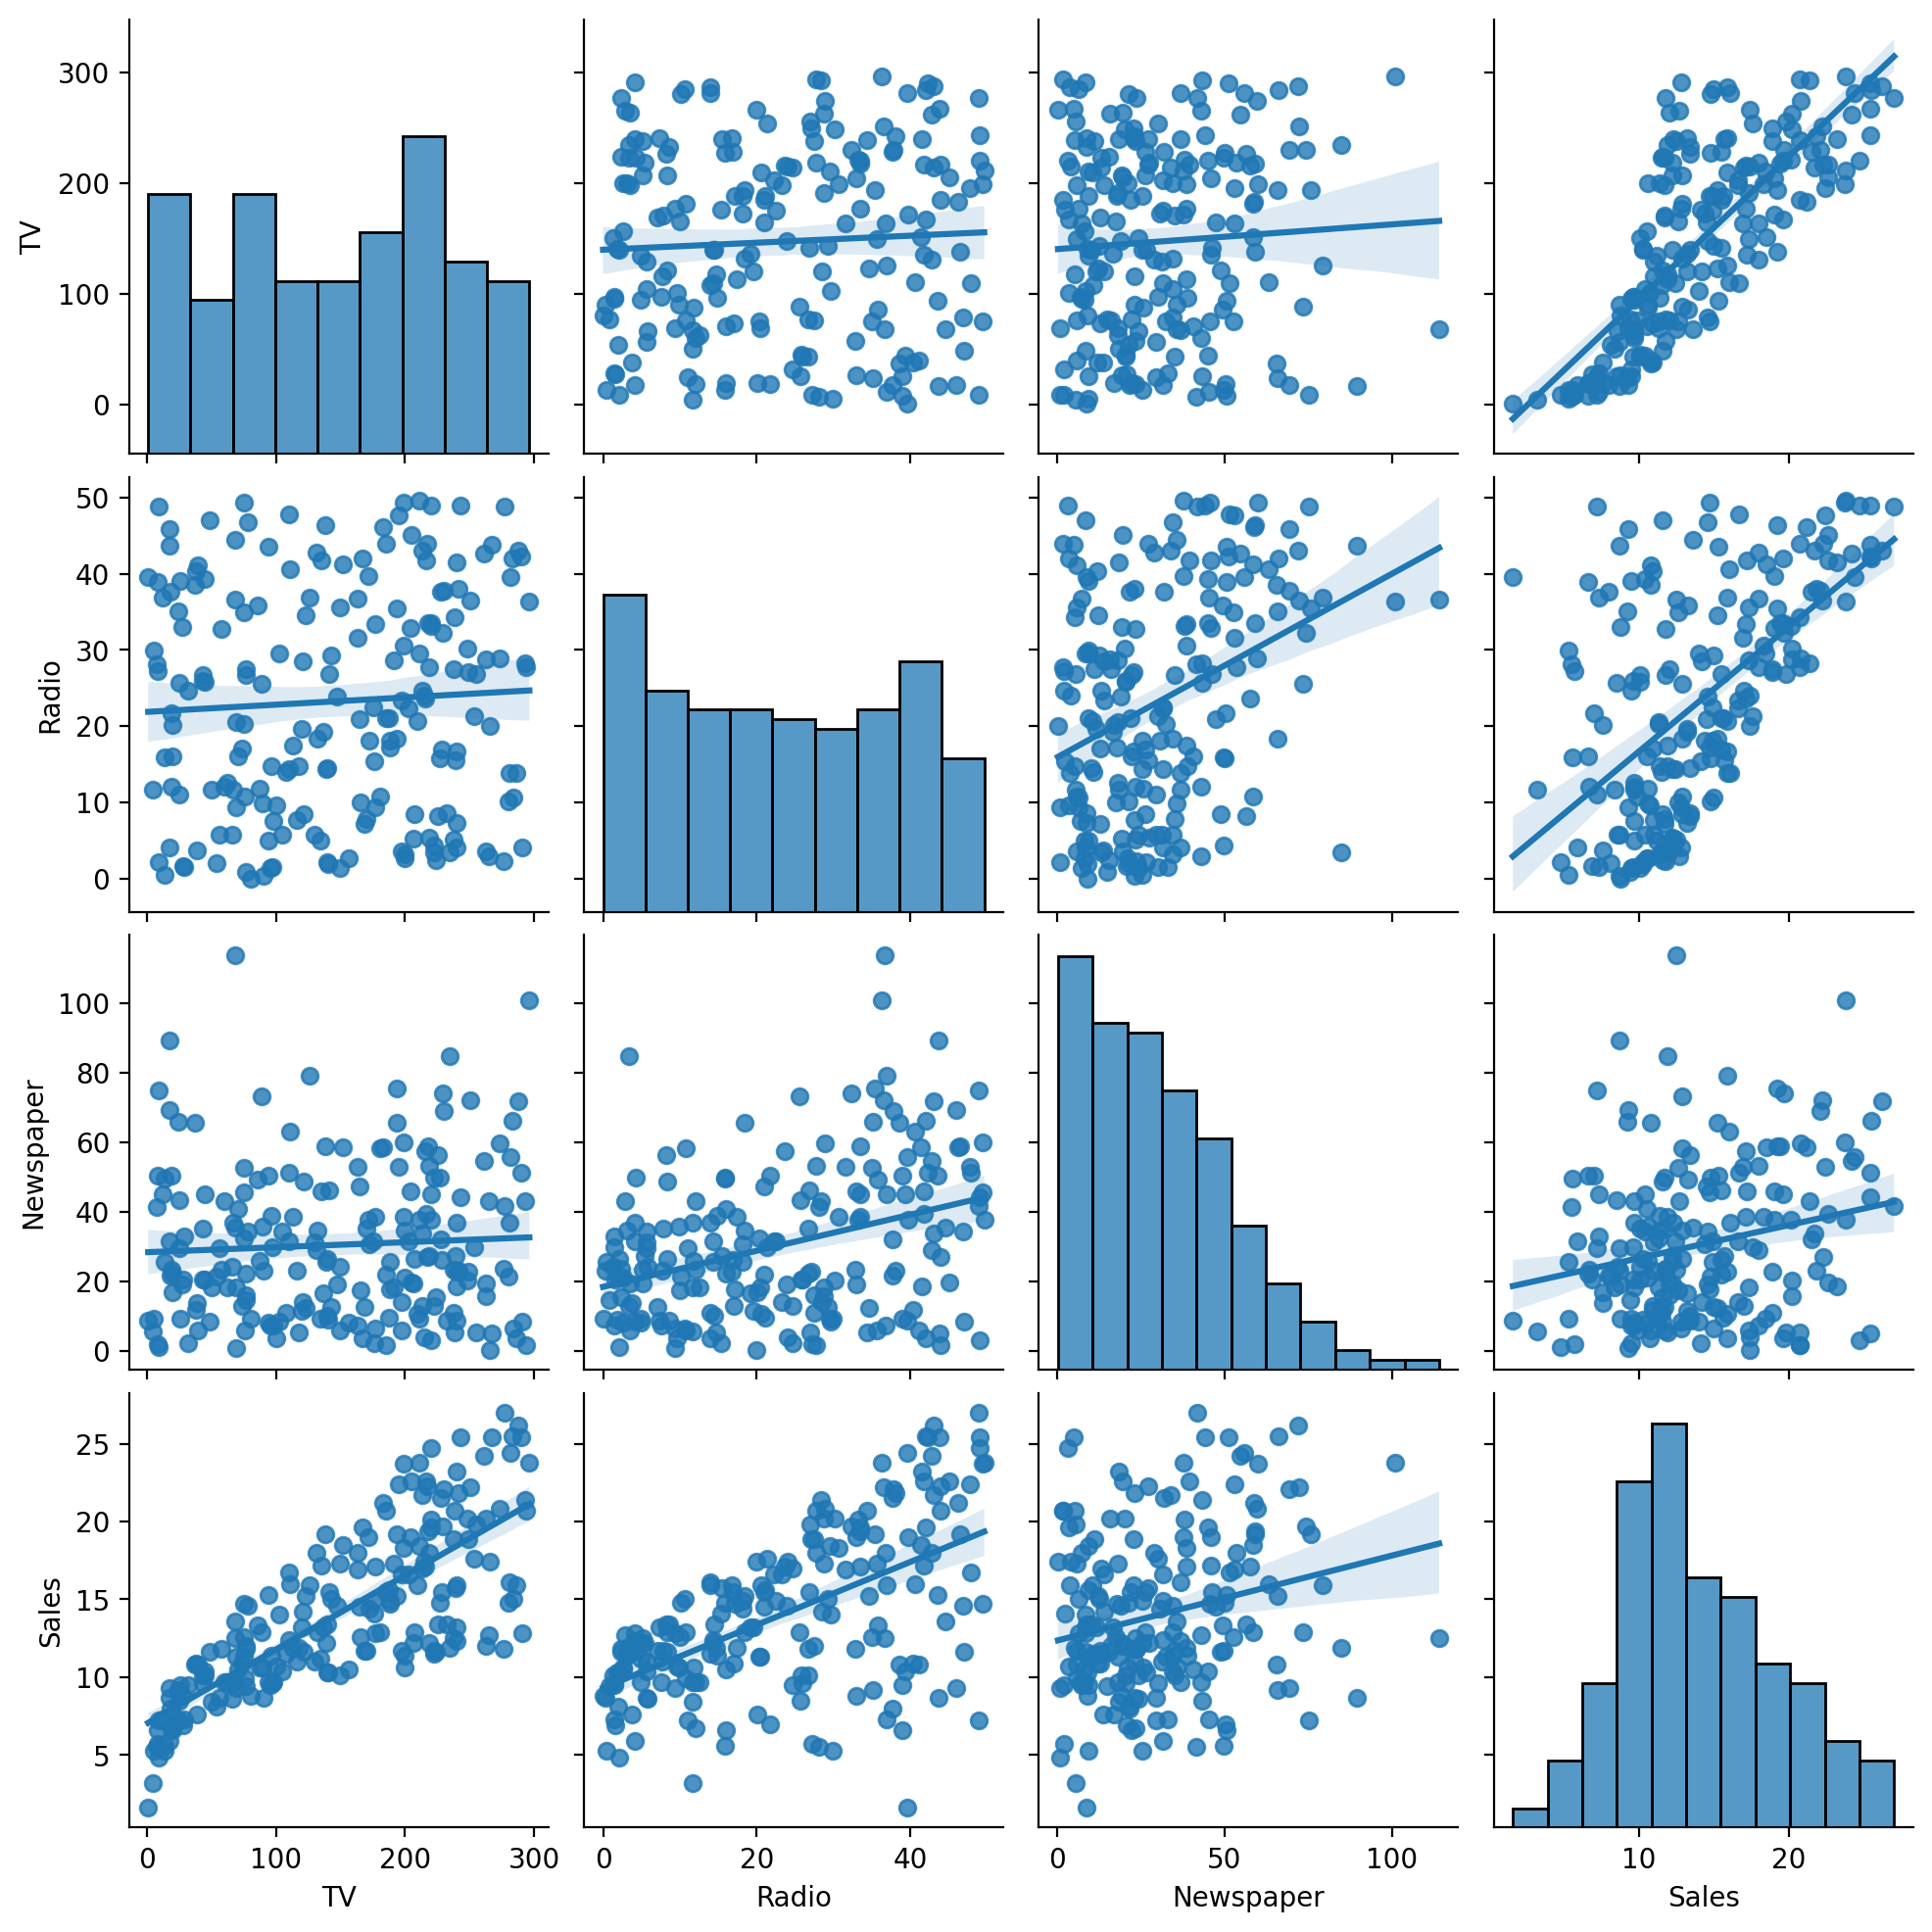

In [7]:
# as we have only 4 variables, so let's see the pair plot

sns.pairplot(df, kind = 'reg')

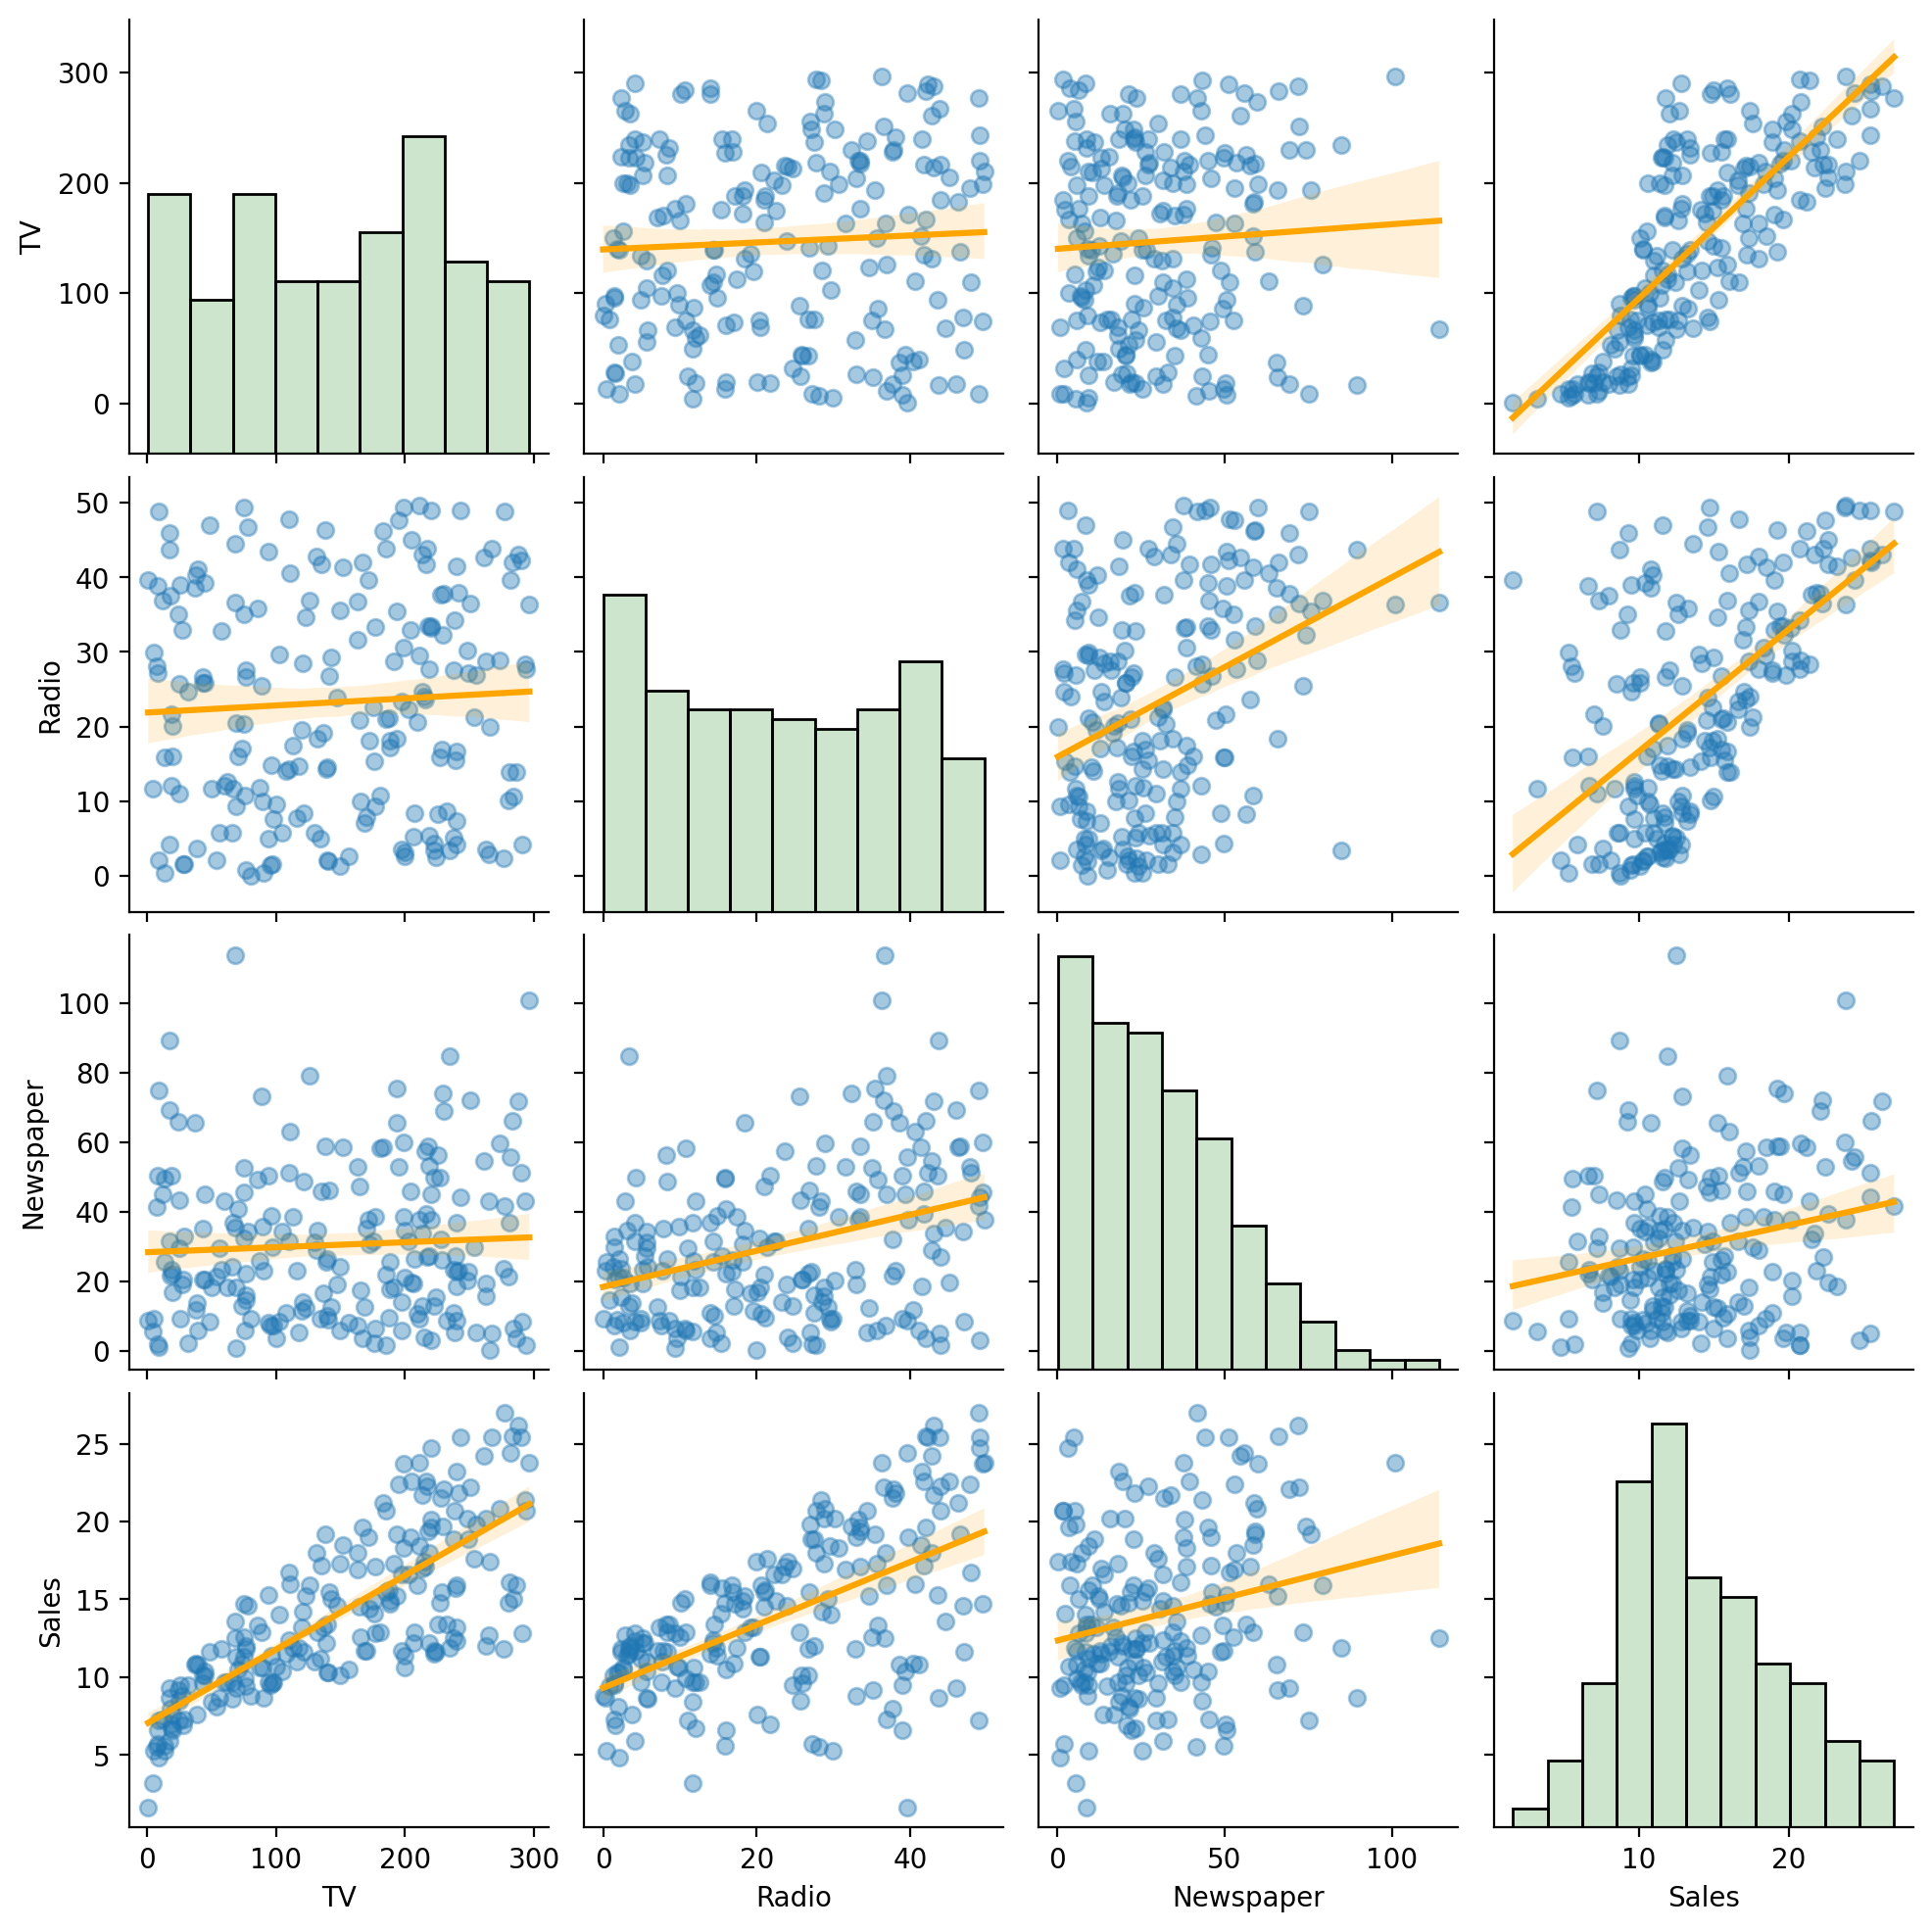

In [8]:
# define our setting

sns.pairplot(df, kind = 'reg', plot_kws = {'scatter_kws': {'alpha': 0.4}, 'line_kws': {'color': 'orange'}}, diag_kws = {'color': 'green', 'alpha': 0.2});

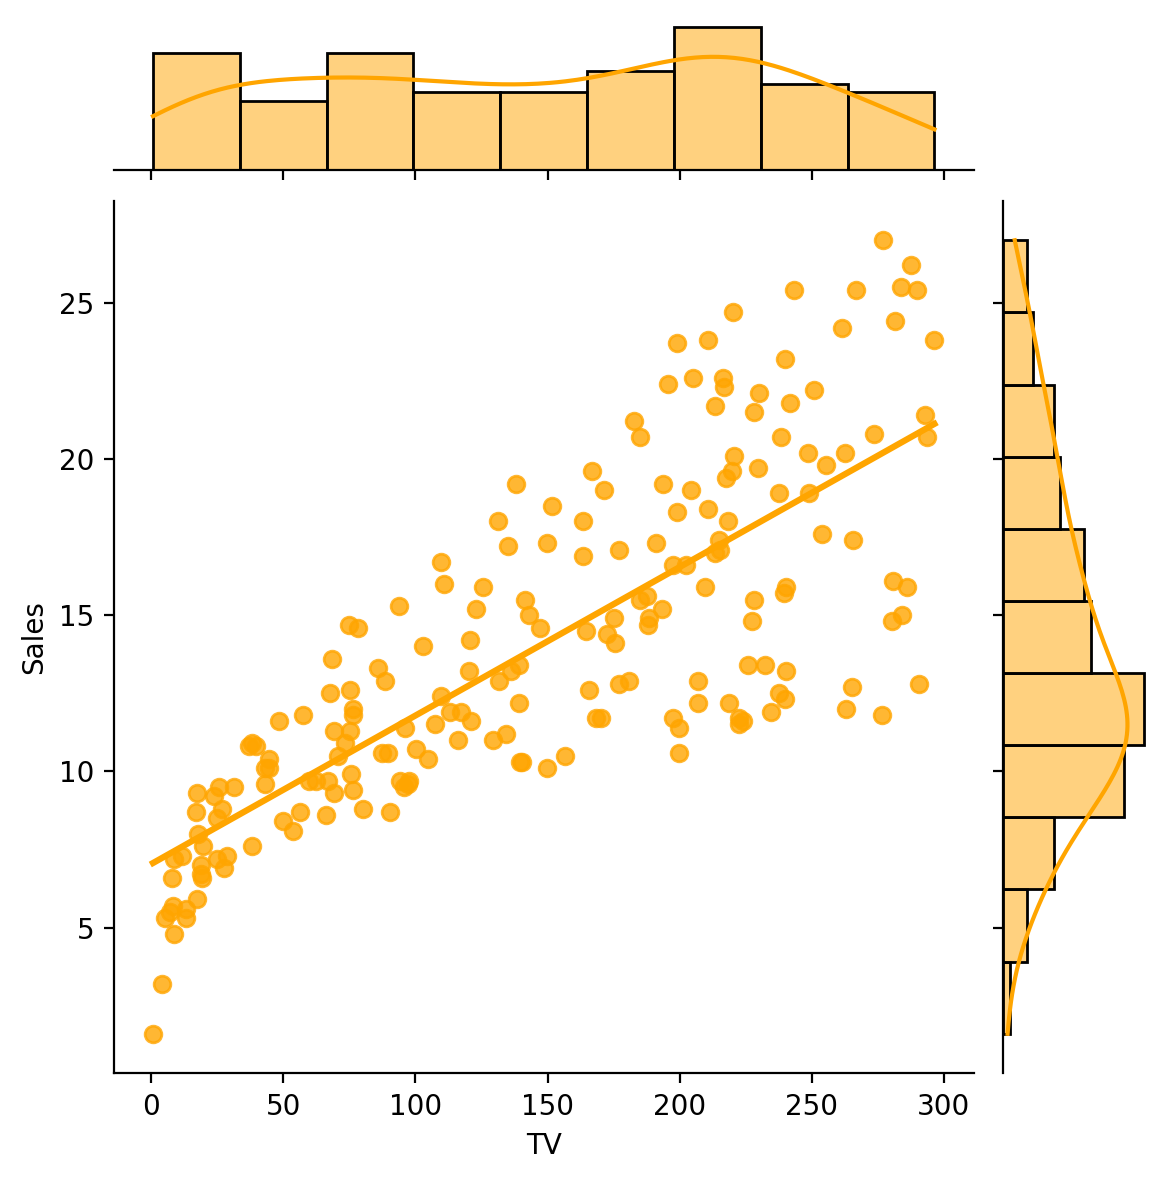

In [9]:
sns.jointplot(data = df, x = 'TV', y = 'Sales', kind = 'reg', ci = None, color = 'orange')

### sklearn: Linear Regression

In [10]:
# import libraries

import sklearn 
from sklearn.linear_model import LinearRegression

In [11]:
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 1.2.0


In [12]:
model = LinearRegression() # create a model
model

LinearRegression()

In [13]:
len(df)

200

In [14]:
df.head(3)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3


In [15]:
# training data set

X = df.drop(columns = ['Sales'])[:140]
X.tail(3)

,TV,Radio,Newspaper
138,273.7,28.9,59.7
139,43.0,25.9,20.5
140,184.9,43.9,1.7


In [16]:
len(X)

140

In [17]:
y = df['Sales'].iloc[:140]

In [18]:
y.loc[0:3] # using loc to get required data

1    22.1
2    10.4
3     9.3
Name: Sales, dtype: float64

In [19]:
len(y)

140

In [20]:
# train a model

model.fit(X, y)

LinearRegression()

In [21]:
# get R-squared score

model.score(X, y)

0.8937102367013778

In [22]:
model.intercept_

3.0451422090371185

In [23]:
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [24]:
model.coef_ # get X's coeficient

array([ 0.04704868,  0.17968299, -0.00300557])

In [25]:
model.predict([[200, 40, 70]]) # predict y (Sales) value when x = [200, 40, 70]

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.43180837])

In [26]:
model.predict([
    [200, 40, 70],
    [100, 80, 50],
    [40, 20, 10]
])

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.43180837, 21.97437115,  8.49069357])

In [27]:
# get test set from df

X_test = df.drop(columns = ['Sales'])[140:]
X_test.tail(3)

,TV,Radio,Newspaper
198,177.0,9.3,6.4
199,283.6,42.0,66.2
200,232.1,8.6,8.7


In [28]:
y_hat = model.predict(X_test) # feed each X to predict y
y_hat

array([ 9.5143544 , 18.29202877, 19.27094064,  8.88723582, 10.11361706,
        9.96041972, 15.62706788, 23.1587013 , 12.03845031,  9.72212471,
       18.63809455, 10.10099867, 16.48589616, 18.12468609, 15.64364266,
        5.30523275, 15.12744231, 10.25358725, 10.09006252, 12.44362791,
       14.3210309 , 13.3616908 , 15.08443331, 17.32769433, 11.18435749,
       14.4341081 , 10.57847377, 13.65085298, 17.24682604, 18.30648623,
        7.42659652, 14.39756088,  7.52782982, 12.20541805, 14.08031808,
       24.73378746, 20.09744782, 12.3485591 , 16.40555117, 12.5803357 ,
       10.85519521, 14.21321462,  6.62420582, 24.08691176, 18.72317811,
       20.7349155 ,  9.90581943, 17.13834561, 18.98753788,  6.02878648,
       12.27110367,  8.5198605 ,  4.49610391, 18.42872767, 16.46701074,
        5.46575208,  8.33322951, 13.02457489, 23.73586521, 15.48426632])

In [29]:
len(y_hat)

60

In [30]:
dc = pd.concat([df[140:].reset_index(), pd.Series(y_hat, name = 'predicted')], axis = 'columns') # for beautiful view data that we will see the real y (Sales) and the predicted values
dc

,index,TV,Radio,Newspaper,Sales,predicted
0,141,73.4,17.0,12.9,10.9,9.514354
1,142,193.7,35.4,75.6,19.2,18.292029
2,143,220.5,33.2,37.9,20.1,19.270941
3,144,104.6,5.7,34.4,10.4,8.887236
4,145,96.2,14.8,38.9,11.4,10.113617
5,146,140.3,1.9,9.0,10.3,9.960420
6,147,240.1,7.3,8.7,13.2,15.627068
7,148,243.2,49.0,44.3,25.4,23.158701
8,149,38.0,40.3,11.9,10.9,12.038450
9,150,44.7,25.8,20.6,10.1,9.722125


### another mothod: using Statsmodel: Multiple Linear Regression
- Statsmodel provides more details that sklearn

In [31]:
# !pip install statsmodels

In [32]:
# import libraries

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [33]:
# formula: response - predictor1 + predictor2

model_a = smf.ols(formula = 'Sales ~ TV + Radio + Newspaper', data = df[:140]).fit() # to get model in R style

In [34]:
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     381.2
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           5.60e-66
Time:                        14:40:44   Log-Likelihood:                -273.89
No. Observations:                 140   AIC:                             555.8
Df Residuals:                     136   BIC:                             567.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0451      0.391      7.782      0.0

In [35]:
model_a.params # get coef

Intercept    3.045142
TV           0.047049
Radio        0.179683
Newspaper   -0.003006
dtype: float64

In [36]:
model_a.pvalues # views more digit of p-value

Intercept    1.608608e-12
TV           1.091697e-57
Radio        1.161068e-34
Newspaper    6.689820e-01
dtype: float64

In [37]:
model.intercept_ # sklearn

3.0451422090371185

In [38]:
model.coef_

array([ 0.04704868,  0.17968299, -0.00300557])

In [39]:
# as the statsmodels show, we can see the p-value of Newspaper = 0.669 which is not significant. Then we can drop this colum

model_a = smf.ols(formula = 'Sales ~ TV + Radio', data = df).fit()
model_a

In [40]:
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 23 Jan 2024   Prob (F-statistic):           4.83e-98
Time:                        14:40:44   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0